<a href="https://colab.research.google.com/github/fahammed2022/Deep-Learning-Projects/blob/main/Image%20classification%20using%20the%20CIFAR-10%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 6619 - Deep Learning - Dr. Marques - Spring 2023
#Project 4
#Image classification using the CIFAR-10 dataset
**Group Members:**

###Sandip Rijal
**Z-number: Z23709567**

###Fahad Ahammed
**Z-number: Z23685691**

###Jannatul Ferdous Shorna
**Z-number: Z23692384**

**Notebook URL:** https://colab.research.google.com/drive/165sjG1yiWzPpXqILquscmxT2FwJ2-l5U?usp=sharing

Inspired by:

https://www.kaggle.com/c/cifar-10

https://keras.io/examples/vision/metric_learning/

https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer


### Setup

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

import random

import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data
x_train = x_train.astype("float32") / 255.0
y_train = np.squeeze(y_train)
x_test = x_test.astype("float32") / 255.0
y_test = np.squeeze(y_test)

170498071/170498071 [==============================] - 3s 0us/step


### Part 2: Explore dataset

In [ ]:
# Number of samples
print("Number of training sample: ",y_train.shape[0])
print("Number of test samples: ", y_test.shape[0])

Number of training sample:  50000
Number of test samples:  10000


In [ ]:
# Number of classes
num_classes = max(y_test)+1
print(num_classes)

10


In [ ]:
# Shape of image data
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


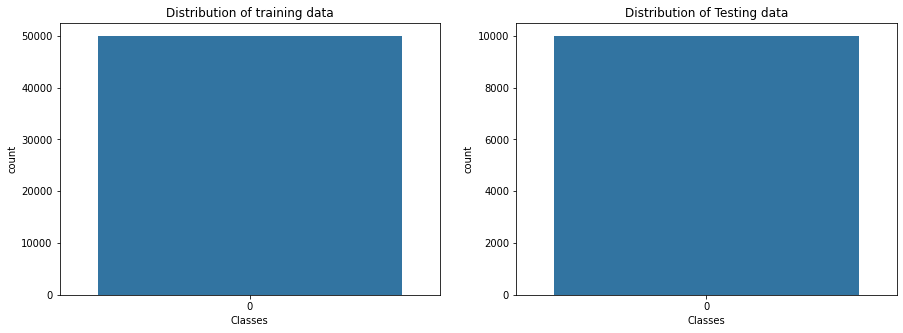

In [ ]:
# Distribution of classes in training samples

fig, axs = plt.subplots(1,2,figsize=(15,5))
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

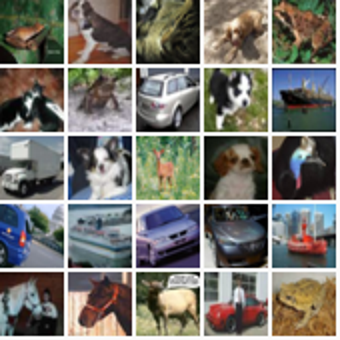

In [ ]:
# Show collage of 25 (randomly selected) images

height_width = 32


def show_collage(examples):
    box_size = height_width + 2
    num_rows, num_cols = examples.shape[:2]

    collage = Image.new(
        mode="RGB",
        size=(num_cols * box_size, num_rows * box_size),
        color=(250, 250, 250),
    )
    for row_idx in range(num_rows):
        for col_idx in range(num_cols):
            array = (np.array(examples[row_idx, col_idx]) * 255).astype(np.uint8)
            collage.paste(
                Image.fromarray(array), (col_idx * box_size, row_idx * box_size)
            )

    # Double size for visualisation.
    collage = collage.resize((2 * num_cols * box_size, 2 * num_rows * box_size))
    return collage


# Show a collage of 5x5 random images.
sample_idxs = np.random.randint(0, 50000, size=(5, 5))
examples = x_train[sample_idxs]
show_collage(examples)

In [ ]:
idx = y_train[0]
print(idx)

6


In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
labels[idx]

'Frog'

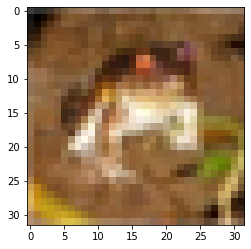

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Convert class vectors to binary class matrices.
# This is called one-hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Part 3: Build your 1st model

In this case we will start by using a convolutional neural network (CNN) built from scratch.


In [ ]:
batch_size = 128
epochs = 40
data_augmentation = False

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Part 4: Train your first model

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/40
391/391 [==============================] - 18s 14ms/step - loss: 2.0284 - accuracy: 0.2551 - val_loss: 1.7634 - val_accuracy: 0.3773
Epoch 2/40
391/391 [==============================] - 5s 14ms/step - loss: 1.7152 - accuracy: 0.3792 - val_loss: 1.6031 - val_accuracy: 0.4316
Epoch 3/40
391/391 [==============================] - 5s 13ms/step - loss: 1.5708 - accuracy: 0.4297 - val_loss: 1.4583 - val_accuracy: 0.4765
Epoch 4/40
391/391 [==============================] - 5s 13ms/step - loss: 1.4863 - accuracy: 0.4636 - val_loss: 1.3928 - val_accuracy: 0.5011
Epoch 5/40
391/391 [==============================] - 5s 13ms/step - loss: 1.4248 - accuracy: 0.4869 - val_loss: 1.3412 - val_accuracy: 0.5192
Epoch 6/40
391/391 [==============================] - 5s 13ms/step - loss: 1.3665 - accuracy: 0.5126 - val_loss: 1.2980 - val_accuracy: 0.5405
Epoch 7/40
391/391 [==============================] - 5s 13ms/step - loss: 1.3180 - accuracy: 0.5304 - val_loss: 1.2712 - val_accuracy: 0.553

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


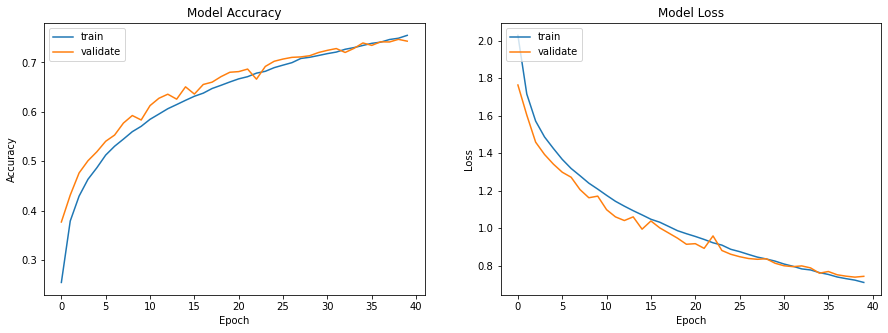

In [ ]:
plotmodelhistory(history)

### Part 5: Evaluate your 1st model

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7424 - accuracy: 0.7428
Test loss: 0.7423666715621948
Test accuracy: 0.7427999973297119
313/313 [==============================] - 1s 2ms/step


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

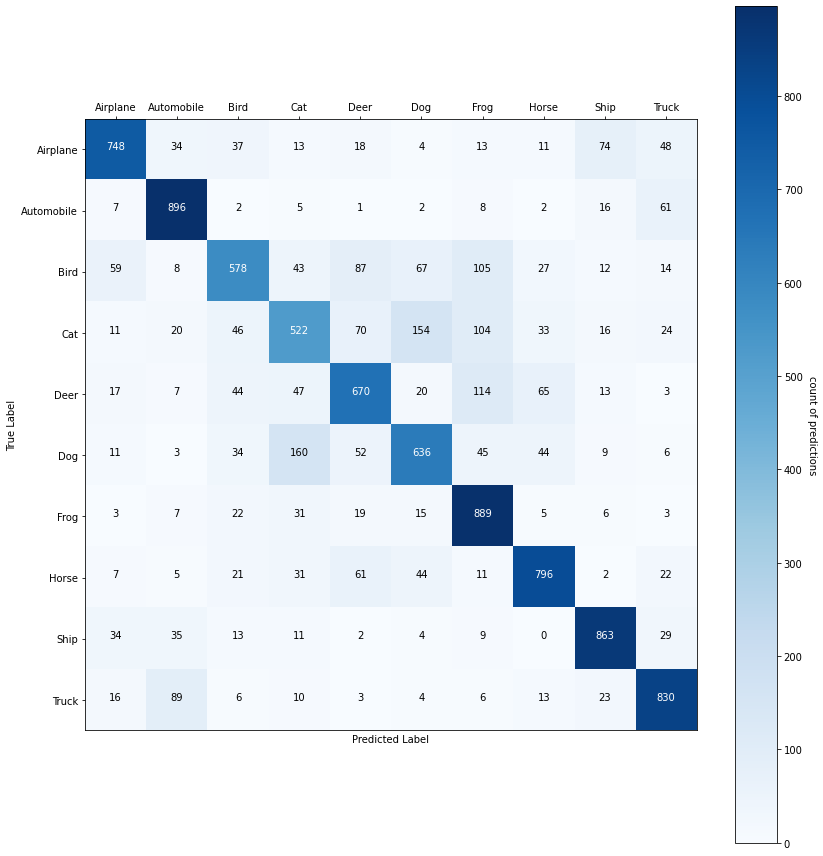

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1000
           1       0.81      0.90      0.85      1000
           2       0.72      0.58      0.64      1000
           3       0.60      0.52      0.56      1000
           4       0.68      0.67      0.68      1000
           5       0.67      0.64      0.65      1000
           6       0.68      0.89      0.77      1000
           7       0.80      0.80      0.80      1000
           8       0.83      0.86      0.85      1000
           9       0.80      0.83      0.81      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



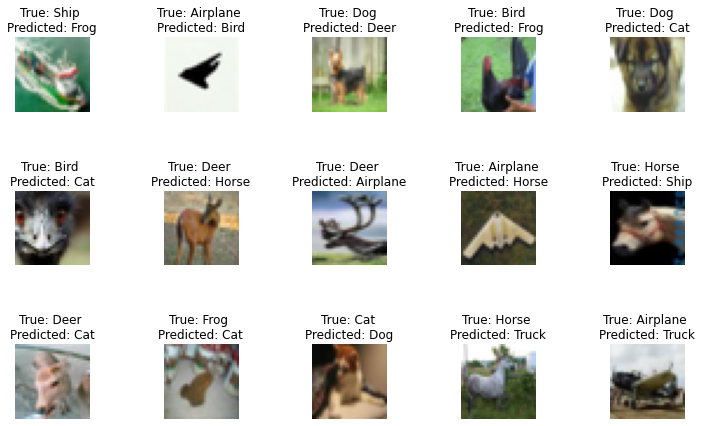

In [ ]:
# Inspect errors
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]],
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    predict_x=model.predict(test_image)
    test_result=np.argmax(predict_x,axis=1)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

1/1 [==============================] - 0s 112ms/step


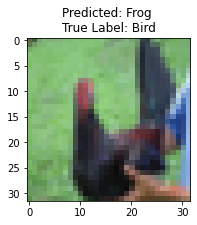

In [ ]:
show_test(25)

**QUESTION 1:** Which classes are more likely to be misclassified by this model? Does this make intuitive sense?

**Answer:** We can observe from the confusion matrix that the classes Dog, Cat, Deer, and Bird are those that are mostly misclassified by the model. The confusion matrix shows the greatest inaccuracy made by the dog, which was 160 times predicted as the cat. The second inaccurate class is Cat which predicted by Dog 154 times. In addition Deer predicted 114 times as Frog and Bird predicted 105 times as Frog. As we can see the model it works with the image pixel and most of the confusion creates for that. For example, we have a green color of frog and the model learned that the frog has a green color image. But when it tries to predict a ship with a green background it predicts that also a frog. In this way, the model makes mistakes in classifying different class labels.

### Part 6: Transfer Learning

#### Transfer Learning: setup

In [ ]:
from keras import Sequential
from tensorflow.keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
#Import dataset (again)
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Print the dimensions of the datasets to make sure everything's kosher

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
# Lets print the dimensions one more time to see if things changed the way we expected

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


#### Attempt #1: using ResNet50 as a base model

Learn more about ResNet50 at: https://www.kaggle.com/keras/resnet50

In [ ]:
base_model_1 = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu')))
model_1.add(Dense(1000,activation=('relu')))
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
batch_size= 128
epochs=10
learn_rate=.003

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate)

In [ ]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 43s 103ms/step - loss: 1.2565 - accuracy: 0.5624 - val_loss: 1.0206 - val_accuracy: 0.6555
Epoch 2/10
274/274 [==============================] - 19s 70ms/step - loss: 0.6646 - accuracy: 0.7715 - val_loss: 0.8343 - val_accuracy: 0.7209
Epoch 3/10
274/274 [==============================] - 20s 72ms/step - loss: 0.4319 - accuracy: 0.8513 - val_loss: 0.7744 - val_accuracy: 0.7547
Epoch 4/10
274/274 [==============================] - 20s 73ms/step - loss: 0.2837 - accuracy: 0.9001 - val_loss: 0.8739 - val_accuracy: 0.7421
Epoch 5/10
274/274 [==============================] - 21s 78ms/step - loss: 0.2028 - accuracy: 0.9299 - val_loss: 0.9044 - val_accuracy: 0.7539
Epoch 6/10
274/274 [==============================] - 20s 73ms/step - loss: 0.1631 - accuracy: 0.9442 - val_loss: 1.2613 - val_accuracy: 0.7063
Epoch 7/10
274/274 [==============================] - 20s 73ms/step - loss: 0.1288 - accuracy: 0.9560 - val_loss: 1.0094 - val_accuracy

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


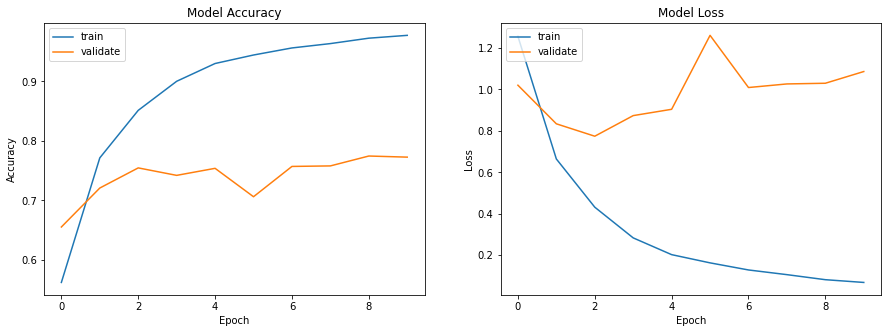

In [ ]:
plotmodelhistory(history_1)

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.1157 - accuracy: 0.7727
Test loss: 1.11570143699646
Test accuracy: 0.7727000117301941
313/313 [==============================] - 4s 10ms/step


In [ ]:
  def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [ ]:
predict_x=model.predict(x_test)
y_pred=np.argmax(predict_x,axis=1)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

313/313 [==============================] - 1s 2ms/step


Confusion matrix, without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

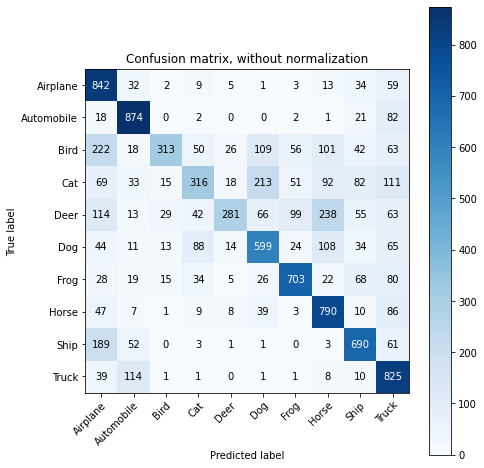

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

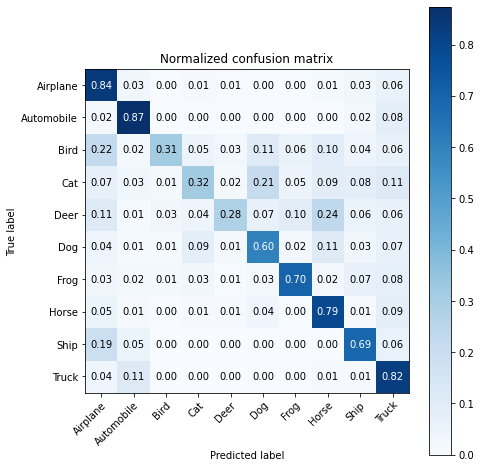

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')
# plt.show()

#### Attempt #2: Your turn!

Write code to build, train, and evaluate *another* transfer learning model.

Here are a few things you could do:
*   Use a different base model, e.g., VGG19 (see https://www.kaggle.com/keras/vgg19)
*   Add Dropout layers
*   Use data augmentation
*   Change optimizer
*   Change other hyperparameters (learning rate, batch size, etc.)









#####SAMPLE SOLUTION

The code below uses the same base model and simply changes optimizer and other hyperparameters.

In [ ]:
base_model_4 = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_4=Sequential()
#Add the Dense layers along with activation and batch normalization
model_4.add(base_model_4)
model_4.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_4.add(Dense(4000,activation=('relu'),input_dim=512))
model_4.add(Dense(2000,activation=('relu')))
model_4.add(Dense(1000,activation=('relu')))
model_4.add(Dense(500,activation=('relu')))
model_4.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [ ]:
# Compile the model
batch_size= 128
epochs=10
learn_rate=.001

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate)

model_4.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_4 = model_4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 59s 93ms/step - loss: 1.4582 - accuracy: 0.4967 - val_loss: 1.9133 - val_accuracy: 0.5097
Epoch 2/10
274/274 [==============================] - 20s 72ms/step - loss: 0.8483 - accuracy: 0.7257 - val_loss: 1.1613 - val_accuracy: 0.6461
Epoch 3/10
274/274 [==============================] - 21s 75ms/step - loss: 0.6849 - accuracy: 0.7813 - val_loss: 1.2962 - val_accuracy: 0.6124
Epoch 4/10
274/274 [==============================] - 20s 73ms/step - loss: 0.5809 - accuracy: 0.8143 - val_loss: 0.9520 - val_accuracy: 0.6917
Epoch 5/10
274/274 [==============================] - 20s 73ms/step - loss: 0.5804 - accuracy: 0.8156 - val_loss: 1.2257 - val_accuracy: 0.6438
Epoch 6/10
274/274 [==============================] - 20s 74ms/step - loss: 0.4192 - accuracy: 0.8659 - val_loss: 1.5462 - val_accuracy: 0.6091
Epoch 7/10
274/274 [==============================] - 21s 76ms/step - loss: 0.4328 - accuracy: 0.8629 - val_loss: 1.1809 - val_accuracy:

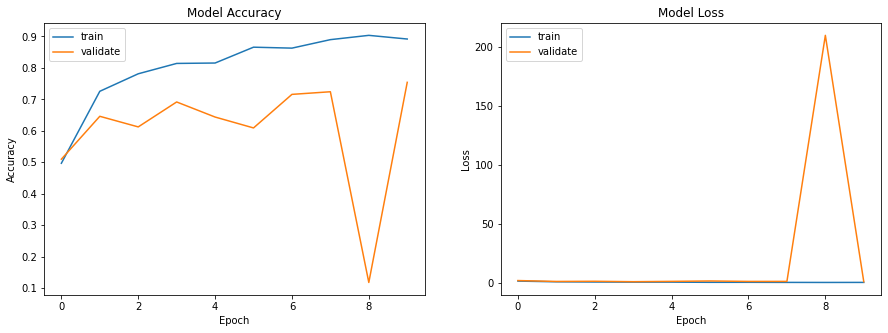

In [ ]:
plotmodelhistory(history_4)

In [ ]:
# Score trained model.
scores = model_4.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_4.predict(x_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9519 - accuracy: 0.7452
Test loss: 0.9519200325012207
Test accuracy: 0.745199978351593
313/313 [==============================] - 4s 9ms/step


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

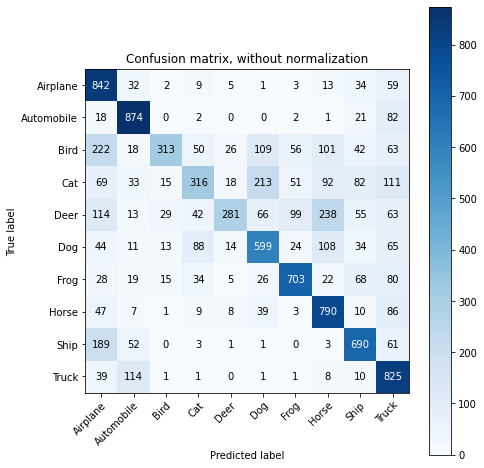

In [ ]:
predict_x=model.predict(x_test)
y_pred=np.argmax(predict_x,axis=1)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

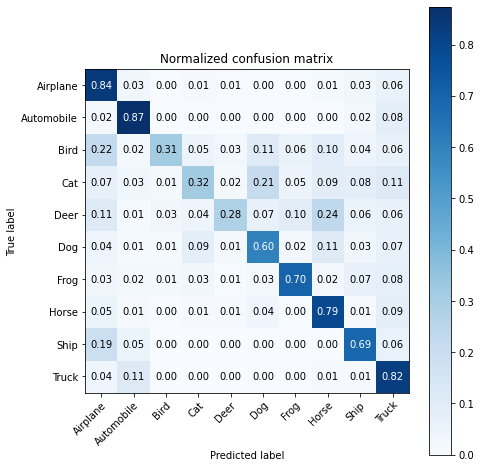

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')
# plt.show()

In [ ]:
from keras.applications.vgg19 import VGG19
# Define the base model
base_model_5 = VGG19(include_top=False,
                     weights='imagenet',
                     input_shape=(32,32,3),
                     classes=y_train.shape[1])


80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Define the model architecture
model_5 = Sequential()
model_5.add(base_model_5)
model_5.add(Flatten())


In [ ]:
# Compile the model
batch_size= 128
epochs=10
learn_rate=.001

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate)

model_4.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Add Dense layers with activation, batch normalization, and dropout
model_5.add(Dropout(0.5))
model_5.add(Dense(200, activation='relu'))
model_5.add(Dropout(0.3))
model_5.add(Dense(4000, activation='relu', input_dim=512))
model_5.add(Dense(2000, activation='relu'))
model_5.add(Dense(1000, activation='relu'))
model_5.add(Dense(500, activation='relu'))
model_5.add(Dense(10, activation='softmax'))

In [ ]:
# Define the optimizer and compile the model
batch_size = 256
epochs = 10
learn_rate = 0.0001
adam = Adam(learning_rate=learn_rate)
model_5.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_5 = model_5.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
137/137 [==============================] - 29s 143ms/step - loss: 2.3406 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.0973
Epoch 2/10
137/137 [==============================] - 16s 119ms/step - loss: 2.3026 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.0973
Epoch 3/10
137/137 [==============================] - 16s 119ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.0973
Epoch 4/10
137/137 [==============================] - 17s 124ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.0973
Epoch 5/10
137/137 [==============================] - 16s 119ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.0973
Epoch 6/10
137/137 [==============================] - 17s 124ms/step - loss: 2.3026 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.0973
Epoch 7/10
137/137 [==============================] - 17s 121ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3027 - val_ac

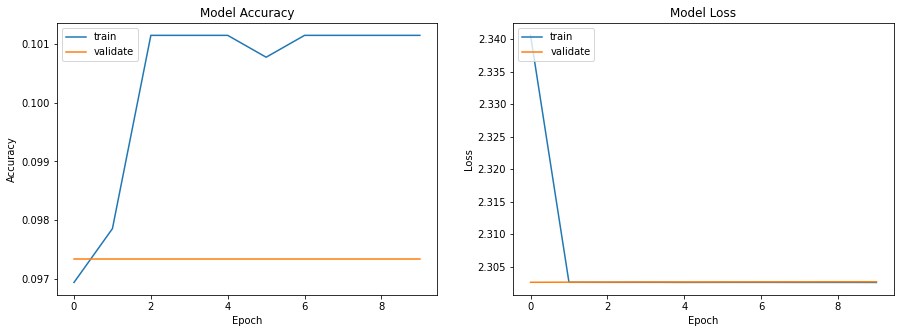

In [ ]:
plotmodelhistory(history_5)

In [ ]:
# Score trained model.
scores = model_5.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_5.predict(x_test)

313/313 [==============================] - 4s 12ms/step - loss: 2.3026 - accuracy: 0.1000
Test loss: 2.3026020526885986
Test accuracy: 0.10000000149011612
313/313 [==============================] - 3s 9ms/step


**QUESTION 2:** Both attempts at transfer learning have resulted in rather
disappointing results for validation/test accuracy. What seems to be the problem here?

**Answer:** We used two transfer learning models here and could see that both models performed badly. The reason for this is, it's a pre-trained model and the training was not started from scratch. We can clearly see that both models have been suffering from overfitting. Getting rid of this is not as simple as we think. We need to work with the different optimizers, the choices of layer, activation function, batch size, etc. It is obviously time-consuming to make the transfer learning model with great accuracy cause we have to tweak different options.  

#### (OPTIONAL) Attempt #3: My turn!


Here's my own attempt using a different model named VGG19

In [ ]:
from keras.applications.vgg19 import VGG19
# Define the base model
base_model_5 = VGG19(include_top=False,
                     weights='imagenet',
                     input_shape=(32,32,3),
                     classes=y_train.shape[1])


80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Define the model architecture
model_5 = Sequential()
model_5.add(base_model_5)
model_5.add(Flatten())


In [ ]:
# Compile the model
batch_size= 128
epochs=10
learn_rate=.001

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate)

model_4.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Add Dense layers with activation, batch normalization, and dropout
model_5.add(Dropout(0.5))
model_5.add(Dense(200, activation='relu'))
model_5.add(Dropout(0.3))
model_5.add(Dense(4000, activation='relu', input_dim=512))
model_5.add(Dense(2000, activation='relu'))
model_5.add(Dense(1000, activation='relu'))
model_5.add(Dense(500, activation='relu'))
model_5.add(Dense(10, activation='softmax'))

In [ ]:
# Define the optimizer and compile the model
batch_size = 256
epochs = 10
learn_rate = 0.0001
adam = Adam(learning_rate=learn_rate)
model_5.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_5 = model_5.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
137/137 [==============================] - 29s 143ms/step - loss: 2.3406 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.0973
Epoch 2/10
137/137 [==============================] - 16s 119ms/step - loss: 2.3026 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.0973
Epoch 3/10
137/137 [==============================] - 16s 119ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.0973
Epoch 4/10
137/137 [==============================] - 17s 124ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.0973
Epoch 5/10
137/137 [==============================] - 16s 119ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.0973
Epoch 6/10
137/137 [==============================] - 17s 124ms/step - loss: 2.3026 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.0973
Epoch 7/10
137/137 [==============================] - 17s 121ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3027 - val_ac

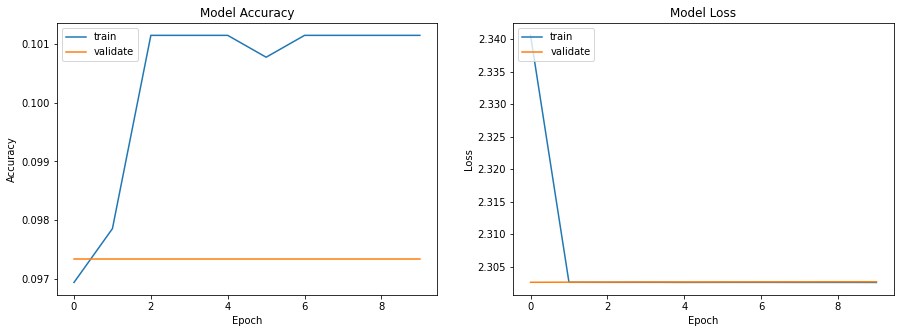

In [ ]:
plotmodelhistory(history_5)

In [ ]:
# Score trained model.
scores = model_5.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_5.predict(x_test)

313/313 [==============================] - 4s 12ms/step - loss: 2.3026 - accuracy: 0.1000
Test loss: 2.3026020526885986
Test accuracy: 0.10000000149011612
313/313 [==============================] - 3s 9ms/step


### Summary table
(manually generated)

| Method | Test accuracy | Remarks |
| --- | --- | --- |
| Baseline CNN | 0.742 | Bad at telling cats from dogs |
| Transfer learning using pre-trained CNN (ResNet50) | 0.772| Disappointly low, signs of overfitting |
| Model / variation of your choice | 0.745| Disappointly low, signs of overfitting | |
| VGG19 Model | 0.10| The model worked very bad in accuracy for all classes |




### Conclusions

We learned how to use Keras, TensorFlow, and Python to construct a complete, fully working deep-learning solution for image classification. For this project, we used the CIFAR-10 dataset which is an established computer-vision dataset used for object recognition. We built the model by baseline CNN and also compared it to other transfer learning models. But surprisingly we can observe that the 2 versions of the pre-trained model(ResNet-50) performed very poorly and both models experienced overfitting. And at the end of the day, we learned how to select a model or how to prepare a model with different parameters, and fine-tune it to get a good outcome. If we could spend more time on this project, we could definitely improve the model performance by tweaking different options.